Final Project

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
any_na = diabetes.isna().any().any()
print(any_na)

False


In [6]:
diabetes2 = diabetes[diabetes['Diabetes_012'] != 1]
diabetes2.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
correlation_matrix = diabetes2.corr().iloc[0]
print(correlation_matrix)

Diabetes_012            1.000000
HighBP                  0.269319
HighChol                0.205684
CholCheck               0.066037
BMI                     0.222353
Smoker                  0.062212
Stroke                  0.107990
HeartDiseaseorAttack    0.181258
PhysActivity           -0.121028
Fruits                 -0.041736
Veggies                -0.058109
HvyAlcoholConsump      -0.057940
AnyHealthcare           0.016241
NoDocbcCost             0.033152
GenHlth                 0.300347
MentHlth                0.071751
PhysHlth                0.175754
DiffWalk                0.223991
Sex                     0.031728
Age                     0.181727
Education              -0.128149
Income                 -0.168651
Name: Diabetes_012, dtype: float64


In [8]:
sorted_row = correlation_matrix.abs().sort_values(ascending=False)
sorted_row.head(6)

Diabetes_012    1.000000
GenHlth         0.300347
HighBP          0.269319
DiffWalk        0.223991
BMI             0.222353
HighChol        0.205684
Name: Diabetes_012, dtype: float64

After running correlation of the variables, we found that **GenHlth**, **HighBP**, **Diffwalk**, **BMI**, and **HighChol** have highest correlation with the Diabetes_012 (after dropping prediabetes).

Text(0.5, 1.0, 'General Health vs Diabetes')

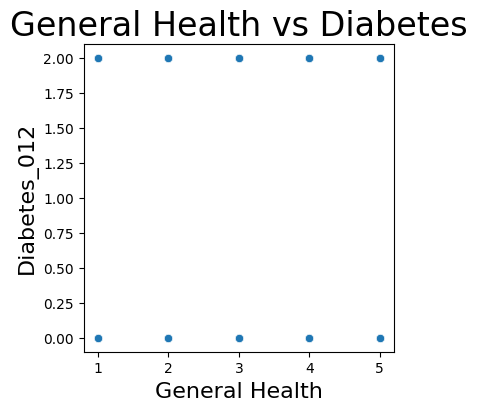

In [10]:
fig, ax = plt.subplots(1, figsize=(4,4))
sns.scatterplot(data = diabetes2, x = diabetes2['GenHlth'], y = diabetes['Diabetes_012'])

ax.set_xlabel('General Health', fontsize=16)
ax.set_ylabel('Diabetes_012', fontsize=16)

ax.set_title('General Health vs Diabetes', fontsize=24)